# Sistemas Inteligentes

## Exercício Computacional 3 - Redução de Dimensionalidade e Regressão

### Identificação do Aluno

#### Nome Completo

ESCREVA AQUI A SUA RESPOSTA

#### RA

ESCREVA AQUI A SUA RESPOSTA

## Instruções

Pesquise por datasets voltados para regressões que estejam disponíveis na biblioteca Scikit, então escolha uma para o este exercício.

Utilize algum método de redução de dimensionalidade para realizar tal processo, então gere três modelos de regressão com diferentes métodos (um método diferente para cada modelo).

Calcule e exiba métricas que ajudem a conferir a qualidade dos modelos gerados.

Exiba gráficos que auxiliem na visualização dos dados e da curva de regressão.

Compare os modelos e comente os resultados obtidos.

Insira as referências utilizadas ao final.

## Desenvolvimento

In [1]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn import linear_model

import numpy as np

In [2]:
X, y = load_boston(return_X_y=True)

Xpca = PCA(n_components=1).fit_transform(X)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(Xpca, y, random_state = 10)
Ridge_reg = linear_model.Ridge().fit(X_train, y_train)
Lasso_reg = linear_model.Lasso().fit(X_train, y_train)
TSR_reg = linear_model.TheilSenRegressor().fit(X_train, y_train)

In [4]:
y_pred_Ridge = Ridge_reg.predict(X_test)
y_pred_Lasso = Lasso_reg.predict(X_test)
y_pred_TSR = TSR_reg.predict(X_test)

In [8]:
from sklearn.metrics import mean_squared_error, r2_score

mse_Ridge = mean_squared_error(y_test, y_pred_Ridge)
r2_Ridge = r2_score(y_test, y_pred_Ridge)

mse_Lasso = mean_squared_error(y_test, y_pred_Lasso)
r2_Lasso = r2_score(y_test, y_pred_Lasso)

mse_TSR = mean_squared_error(y_test, y_pred_TSR)
r2_TSR = r2_score(y_test, y_pred_TSR)


print(f"MSE Ridge: {mse_Ridge}")
print(f"MSE Lasso: {mse_Lasso}")
print(f"MSE TSR: {mse_TSR}")
print(f"R² Ridge: {r2_Ridge}")
print(f"R² Lasso: {r2_Lasso}")
print(f"R² TSR: {r2_TSR}")

MSE Ridge: 87.35362373352808
MSE Lasso: 87.35503889528515
MSE TSR: 99.03981574435116
R² Ridge: 0.12372777663584389
R² Lasso: 0.1237135806942643
R² TSR: 0.006499835557837397


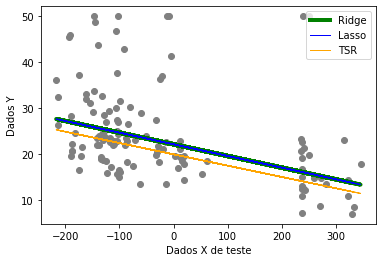

In [6]:
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test,  color='grey')
plt.plot(X_test, y_pred_Ridge, color='green', linewidth=4)
plt.plot(X_test, y_pred_Lasso, color='blue', linewidth=1)
plt.plot(X_test, y_pred_TSR, color='orange', linewidth=1)

plt.legend(['Ridge', 'Lasso', 'TSR'], loc=1)

plt.ylabel('Dados Y')
plt.xlabel('Dados X de teste')

plt.show()

Como podemos observar na comparação da curva e também dos R2 Score. Ridge e Lasso obtém resultados praticamente idênticos.
Ridge é um modelo que resolve a regressão utilizando uma função de perda *linear least squares* (LLS) e a regularização é feita via norma L2 enquanto que o Lasso é um modelo linear utilizando a regularização via norma L1.
Num ponto de vista prático, L1 tende a reduzir os coeficientes para 0 (seleção de *features*)  enquanto L2 reduz os coeficientes uniformemente.

O modelo Theil-Sen Regressor (TSR), por sua vez, calcula o *least squares* utilizando um numero n de subsets das amostras de X. Um valor de n entre o número de *features* e de amostras, leva o modelo à robustez e eficiência. Ao fim das escolhas de n amostras escolhendo n sub amostras, é calculado a mediana L1 de todas as soluções *least square*. Apesar de seu resultado no gráfico parecer muito mais fiel à maioria dos pontos do que os modelos Ridge e Lasso, que são mais simples, seu score R^2 (coeficiente de determinação) é menor por conta da penalização dos valores mais distantes para o cálculo da mediana.

### Referências:

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.TheilSenRegressor.html

https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b

https://explained.ai/regularization/L1vsL2.html

https://towardsdatascience.com/intuitions-on-l1-and-l2-regularisation-235f2db4c261